Problem 1:
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance


There are basically 3 ways to identify the similar stocks according to the performance:


    1) using Correlation coefficient

    2) using K-menas clustering

    3) PCA algorithm



**Using correlation coefficient matrix**

In [1]:
# importing the library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [13]:
stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering/data_stocks.csv')

In [14]:
stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [17]:
stock.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [18]:
stock['DATE'] = pd.to_datetime(stock['DATE'])

In [28]:
stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-01 00:00:01.491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-01 00:00:01.491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-01 00:00:01.491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-01 00:00:01.491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-01 00:00:01.491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [76]:
correlation_matrix = stock.corr()

In [77]:
correlation_matrix

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
SP500,1.000000,0.712007,0.553332,0.909061,0.219471,0.562785,0.834350,-0.690018,0.450572,0.752814,...,0.847975,-0.848511,0.741641,0.820043,-0.517492,0.805525,0.849908,0.915986,0.143752,0.813459
NASDAQ.AAL,0.712007,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.553332,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.909061,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.219471,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.XRX,0.805525,0.522341,0.341687,0.806615,-0.017967,0.589464,0.577194,-0.542393,0.696062,0.371468,...,0.605548,-0.867222,0.636184,0.717401,-0.623126,1.000000,0.866193,0.785073,0.081512,0.588426
NYSE.XYL,0.849908,0.395730,0.693062,0.911106,0.067258,0.634191,0.701701,-0.668413,0.679090,0.485314,...,0.548014,-0.737225,0.811981,0.610465,-0.798461,0.866193,1.000000,0.842826,-0.246085,0.581894
NYSE.YUM,0.915986,0.642336,0.627531,0.939185,0.261173,0.418591,0.915175,-0.863792,0.343294,0.770276,...,0.825260,-0.862418,0.855050,0.763547,-0.634492,0.785073,0.842826,1.000000,0.018217,0.899693
NYSE.ZBH,0.143752,0.588241,-0.580055,-0.067235,0.130786,-0.201805,0.016689,0.212780,-0.259731,0.236575,...,0.369747,-0.322979,-0.310343,0.339366,0.458027,0.081512,-0.246085,0.018217,1.000000,0.271767


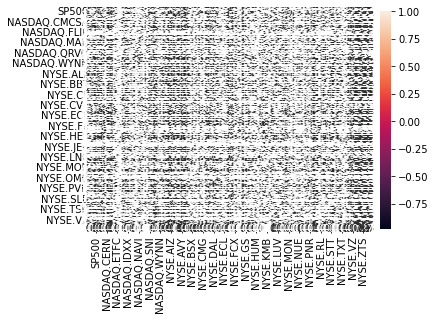

In [78]:
#plotting the values 
sns.heatmap(correlation_matrix, annot=True)

In [79]:
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Clustering/corr.png')

<Figure size 432x288 with 0 Axes>

*selecting the top 5 stocks with the highest correlation*



In [80]:
# sort the correlation matrix by the correlation value of stockA
similar_stocks = correlation_matrix.sort_values('SP500', axis=0, ascending=False)
n = 5 # number of similar stocks to select
top_5_similar_stocks = similar_stocks['SP500'][1:n+1]
# print the top similar stocks
print(top_5_similar_stocks)

NYSE.SPGI    0.957617
NYSE.TDG     0.943494
NYSE.HON     0.942110
NYSE.AET     0.941181
NYSE.TEL     0.941078
Name: SP500, dtype: float64


*selecting the top 10 stocks with the highest correlation*





In [82]:
n = 10
top_10_similar_stocks = similar_stocks['SP500'][1:n+1]
# print the top similar stocks
print(top_10_similar_stocks)

NYSE.SPGI      0.957617
NYSE.TDG       0.943494
NYSE.HON       0.942110
NYSE.AET       0.941181
NYSE.TEL       0.941078
NASDAQ.MSFT    0.939462
NYSE.ACN       0.938498
NYSE.AON       0.938288
NYSE.CSRA      0.938088
NYSE.CCL       0.936211
Name: SP500, dtype: float64


*selecting the top 20 stocks with the highest correlation*


In [83]:
n = 20
top_20_similar_stocks = similar_stocks['SP500'][1:n+1]
# print the top similar stocks
print(top_20_similar_stocks)

NYSE.SPGI      0.957617
NYSE.TDG       0.943494
NYSE.HON       0.942110
NYSE.AET       0.941181
NYSE.TEL       0.941078
NASDAQ.MSFT    0.939462
NYSE.ACN       0.938498
NYSE.AON       0.938288
NYSE.CSRA      0.938088
NYSE.CCL       0.936211
NASDAQ.PYPL    0.933777
NYSE.SYK       0.927304
NASDAQ.NVDA    0.926446
NYSE.ROP       0.926016
NASDAQ.ATVI    0.922833
NASDAQ.CTSH    0.921329
NYSE.COO       0.920767
NASDAQ.LKQ     0.917071
NYSE.YUM       0.915986
NYSE.UNH       0.914201
Name: SP500, dtype: float64


*selecting the top 50 stocks with the highest correlation*


In [84]:
n = 50
top_50_similar_stocks = similar_stocks['SP500'][1:n+1]
# print the top similar stocks
print(top_50_similar_stocks)

NYSE.SPGI      0.957617
NYSE.TDG       0.943494
NYSE.HON       0.942110
NYSE.AET       0.941181
NYSE.TEL       0.941078
NASDAQ.MSFT    0.939462
NYSE.ACN       0.938498
NYSE.AON       0.938288
NYSE.CSRA      0.938088
NYSE.CCL       0.936211
NASDAQ.PYPL    0.933777
NYSE.SYK       0.927304
NASDAQ.NVDA    0.926446
NYSE.ROP       0.926016
NASDAQ.ATVI    0.922833
NASDAQ.CTSH    0.921329
NYSE.COO       0.920767
NASDAQ.LKQ     0.917071
NYSE.YUM       0.915986
NYSE.UNH       0.914201
NYSE.STT       0.913917
NYSE.CI        0.913024
NYSE.MA        0.912743
NASDAQ.AVGO    0.909787
NASDAQ.ADBE    0.909061
NYSE.NOC       0.905343
NYSE.ROK       0.904653
NYSE.FIS       0.902871
NYSE.ABT       0.902382
NYSE.BLK       0.898836
NASDAQ.WLTW    0.897509
NYSE.TSO       0.896927
NYSE.MCD       0.896761
NYSE.BAX       0.895738
NYSE.GPN       0.893996
NYSE.PGR       0.893949
NYSE.BDX       0.892895
NASDAQ.EXPE    0.892177
NYSE.CAT       0.891911
NYSE.C         0.889387
NYSE.ANTM      0.888930
NASDAQ.FISV    0

# let's calculate how many stocks has correlation more than 80%

In [89]:
top_stocks = similar_stocks[similar_stocks['SP500'] > 0.80]

In [90]:
top_stocks

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
SP500,1.000000,0.712007,0.553332,0.909061,0.219471,0.562785,0.834350,-0.690018,0.450572,0.752814,...,0.847975,-0.848511,0.741641,0.820043,-0.517492,0.805525,0.849908,0.915986,0.143752,0.813459
NYSE.SPGI,0.957617,0.685382,0.535205,0.928965,0.181640,0.533274,0.850937,-0.757156,0.473322,0.734976,...,0.822767,-0.893114,0.781126,0.810592,-0.621270,0.862386,0.881112,0.953529,0.107581,0.841545
NYSE.TDG,0.943494,0.762143,0.497092,0.886863,0.186119,0.510530,0.878420,-0.700221,0.344489,0.785981,...,0.873219,-0.851063,0.738615,0.868029,-0.523547,0.767091,0.793662,0.916762,0.161434,0.842606
NYSE.HON,0.942110,0.620834,0.653871,0.904620,0.173877,0.490176,0.853896,-0.776525,0.461548,0.754614,...,0.846166,-0.780498,0.777724,0.793743,-0.574998,0.758877,0.850989,0.926866,-0.026329,0.841537
NYSE.AET,0.941181,0.701458,0.574448,0.933091,0.177354,0.432104,0.862374,-0.809945,0.437774,0.747417,...,0.846147,-0.892184,0.776100,0.821695,-0.600498,0.840362,0.856027,0.971965,0.094916,0.892887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.ORCL,0.804825,0.611158,0.322627,0.816039,0.019579,0.503489,0.580014,-0.475544,0.642566,0.463159,...,0.665983,-0.806370,0.500387,0.751149,-0.559939,0.883793,0.785692,0.757210,0.237947,0.615603
NYSE.EW,0.803629,0.735754,0.416920,0.736699,0.213819,0.176888,0.820865,-0.740334,0.140829,0.827376,...,0.935890,-0.756669,0.589345,0.811427,-0.294600,0.563712,0.553960,0.856310,0.259398,0.950238
NYSE.PVH,0.802753,0.365817,0.619617,0.872686,0.034492,0.685693,0.632553,-0.597668,0.702320,0.381738,...,0.490710,-0.716268,0.753208,0.582693,-0.807660,0.875316,0.964368,0.785652,-0.240557,0.496710
NYSE.FDX,0.802456,0.703841,0.184772,0.737283,0.170026,0.356468,0.621791,-0.529202,0.358368,0.527514,...,0.689014,-0.940978,0.538272,0.722761,-0.409455,0.843769,0.701758,0.790857,0.399515,0.725093


*There are 130 stocks which are having 80% similar performance with respect to SP500*

In [91]:
names_of_stock = top_stocks.index

In [92]:
print(names_of_stock)

Index(['SP500', 'NYSE.SPGI', 'NYSE.TDG', 'NYSE.HON', 'NYSE.AET', 'NYSE.TEL',
       'NASDAQ.MSFT', 'NYSE.ACN', 'NYSE.AON', 'NYSE.CSRA',
       ...
       'NYSE.CBG', 'NYSE.TRV', 'NASDAQ.CTAS', 'NYSE.XRX', 'NASDAQ.TROW',
       'NYSE.ORCL', 'NYSE.EW', 'NYSE.PVH', 'NYSE.FDX', 'NYSE.IVZ'],
      dtype='object', length=130)


In [95]:
stock[names_of_stock].to_csv('/content/drive/MyDrive/Colab Notebooks/Clustering/similar_performance.csv')

In [96]:
stock[names_of_stock].head()

,SP500,NYSE.SPGI,NYSE.TDG,NYSE.HON,NYSE.AET,NYSE.TEL,NASDAQ.MSFT,NYSE.ACN,NYSE.AON,NYSE.CSRA,...,NYSE.CBG,NYSE.TRV,NASDAQ.CTAS,NYSE.XRX,NASDAQ.TROW,NYSE.ORCL,NYSE.EW,NYSE.PVH,NYSE.FDX,NYSE.IVZ
0,2363.6101,131.27,219.44,124.73,127.6600,74.65,65.810,117.9400,118.89,29.140,...,34.90,120.570,126.8600,7.36,68.25,44.680,93.9800,103.480,196.590,30.610
1,2364.1001,131.27,219.44,124.73,127.6600,74.65,65.775,117.9500,118.89,29.140,...,34.90,120.570,126.8600,7.38,68.45,44.824,93.9699,103.940,196.590,30.680
2,2362.6799,131.25,218.68,125.12,128.3900,74.52,65.705,117.7262,118.77,29.060,...,34.99,120.805,126.9576,7.36,68.29,44.700,93.9100,103.495,196.580,30.722
3,2364.3101,131.32,218.67,125.12,128.3900,74.66,65.715,117.4100,118.59,29.100,...,34.90,120.455,126.7000,7.35,68.19,44.680,93.5900,103.700,196.485,30.660
4,2364.8501,131.49,219.79,124.98,128.7541,74.66,65.700,117.1700,118.73,29.105,...,34.97,120.650,126.8900,7.36,68.28,44.740,93.7300,103.890,196.290,30.630


# let's try to calculate the similar performance stock using PCA

note:- not using time frame because the PCA algorithm always work best with the numerical values

In [101]:
stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-01 00:00:01.491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-01 00:00:01.491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-01 00:00:01.491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-01 00:00:01.491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-01 00:00:01.491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [103]:
new_data = stock.drop('DATE',axis=1)

In [97]:
from sklearn.decomposition import PCA

In [113]:
pca = PCA(n_components=0.99)

In [114]:
pca.fit(new_data)


PCA(n_components=0.99)

In [115]:
values = pca.components_.T

In [116]:
similar_stocks = []
for i in range(values.shape[0]):
    for j in range(i+1, values.shape[0]):
        loading_diff = np.abs(values[i] - values[j])
        if loading_diff[0] < 0.1 and loading_diff[1] < 0.1:
            similar_stocks.append(stock.columns[i])
            similar_stocks.append(stock.columns[j])

# print unique column values of similar stocks
similar_stocks = list(set(similar_stocks))

In [117]:
len(similar_stocks)

496

In [118]:
len(stock.columns)

502

PCA algorithm is givin us the similar stock count values as 496 while we have 502 stocks that mean almost 98.8 % of the stocks are similar in performance

In [120]:
# saving this vaules
stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering/data_stocks.csv')

In [121]:
stock[similar_stocks].to_csv('/content/drive/MyDrive/Colab Notebooks/Clustering/PCA_similar_stocks.csv')